In [1]:
from model import *
import matplotlib.pyplot as plt
import time

In [2]:
def get_negative_samples(model, call_back=0.5):
    """Get the negative samples from model for visualization

    Args:
        model (Net): the instance of Net
        call_back (float, optional): the call_back rate for positive sampling.

    Returns:
        negative: the negative plot set
    """
    # Calculate the prediction
    positive = []
    negative = []
    for x in np.linspace(-6,6,100):
        for y in np.linspace(-6,6,100):
            pos = [x,y]
            if model.forward(pos) > call_back:
                positive.append(pos)
            else:
                negative.append(pos)
    positive = np.array(positive)
    negative = np.array(negative)
    return negative

In [3]:
def visualize_boundary(model):
    """Visualize the boundary of the model

    Args:
        model (Net): the instance of Net
    """

    negative = get_negative_samples(model)
    
    plt.figure(figsize=(5,5))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.scatter(negative[:,0],negative[:,1],8,"black")
    plt.show()

In [4]:
def plot_error(model):
    """Plot the error log from model

    Args:
        model (Net): the instance of Net
    """
    logs = np.array(model.logs)
    plt.figure()
    plt.plot(logs[:,0],logs[:,1],label="train")
    plt.plot(logs[:,0],logs[:,2],label="val")
    if len(logs[0]) > 3:
        plt.plot(logs[:,0],logs[:,3],label="test")
    plt.legend()
    plt.show()

In [5]:
net = Net(0.1)

train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

net = train(net, train_data, 5000, test_data)

Early Stop  250 | T 0.1217 | V 0.1184:   9%|▉         | 450/5000 [00:24<04:04, 18.60epoch/s]


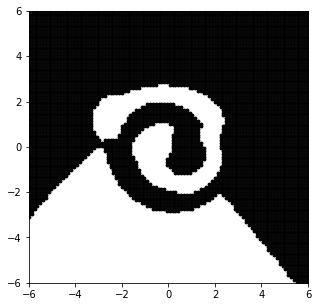

In [6]:
visualize_boundary(net)

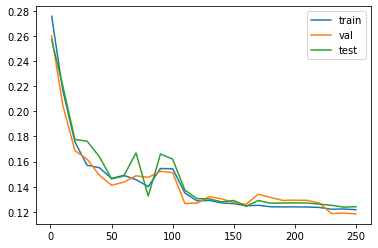

In [7]:
plot_error(net)

Early Stop 1770 | T 0.0437 | V 0.0477:  49%|████▉     | 1970/4000 [01:48<01:51, 18.21epoch/s]
Early Stop 1500 | T 0.1036 | V 0.1025:  42%|████▎     | 1700/4000 [01:37<02:12, 17.37epoch/s]
Early Stop 1220 | T 0.0425 | V 0.0392:  36%|███▌      | 1420/4000 [01:25<02:34, 16.66epoch/s]
Early Stop 1760 | T 0.0855 | V 0.0862:  49%|████▉     | 1960/4000 [01:55<02:00, 16.98epoch/s]
Early Stop 2110 | T 0.0766 | V 0.0761:  58%|█████▊    | 2310/4000 [02:14<01:38, 17.12epoch/s]


lr 0.01 | Avg Time  108s | Avg Test Error 0.1227


Early Stop 3240 | T 0.0904 | V 0.0891:  86%|████████▌ | 3440/4000 [03:26<00:33, 16.66epoch/s]
Early Stop  370 | T 0.1032 | V 0.1030:  14%|█▍        | 570/4000 [00:33<03:20, 17.14epoch/s]
Early Stop  790 | T 0.0995 | V 0.0984:  25%|██▍       | 990/4000 [00:58<02:57, 16.96epoch/s]
Early Stop  610 | T 0.0835 | V 0.0823:  20%|██        | 810/4000 [00:46<03:05, 17.24epoch/s]
Early Stop  420 | T 0.0851 | V 0.0847:  16%|█▌        | 620/4000 [00:36<03:17, 17.10epoch/s]
Early Stop 2860 | T 0.0825 | V 0.0755:  76%|███████▋  | 3060/4000 [03:00<00:55, 16.96epoch/s]


lr 0.05 | Avg Time   71s | Avg Test Error 0.1188


Early Stop 2310 | T 0.0917 | V 0.0894:  63%|██████▎   | 2510/4000 [02:29<01:28, 16.79epoch/s]
Early Stop   70 | T 0.1282 | V 0.1190:   7%|▋         | 270/4000 [00:16<03:44, 16.62epoch/s]
Early Stop  820 | T 0.1060 | V 0.1049:  26%|██▌       | 1020/4000 [00:59<02:53, 17.17epoch/s]
Early Stop  450 | T 0.1236 | V 0.1091:  16%|█▋        | 650/4000 [00:40<03:28, 16.08epoch/s]
Early Stop  180 | T 0.1216 | V 0.1237:  10%|▉         | 380/4000 [00:22<03:33, 16.99epoch/s]
Early Stop  210 | T 0.1282 | V 0.1181:  10%|█         | 410/4000 [00:24<03:30, 17.06epoch/s]


lr 0.10 | Avg Time   32s | Avg Test Error 0.1303


Early Stop  400 | T 0.1191 | V 0.1066:  15%|█▌        | 600/4000 [00:35<03:21, 16.86epoch/s]


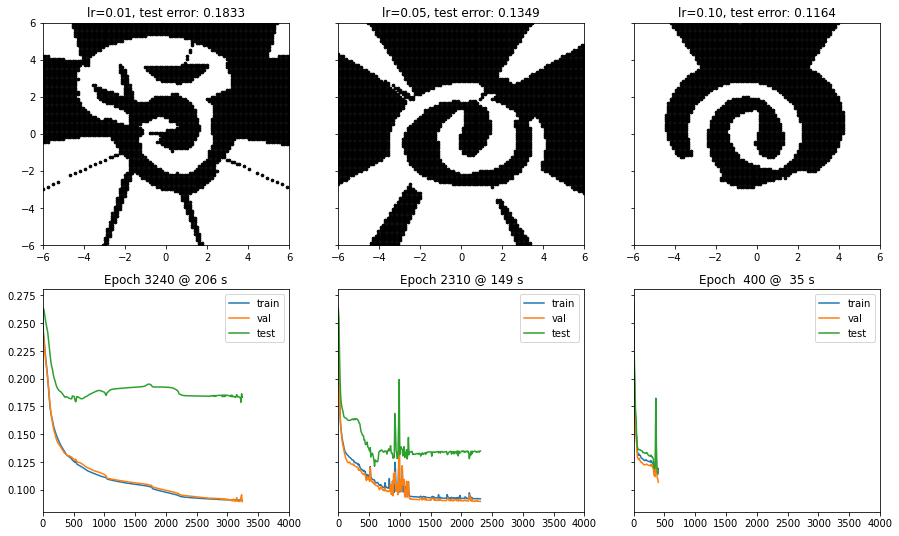

In [8]:
# benchmark

train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

RANDOM_SEED = 42
EPOCH_THRESHOLD = 4000

fig, ax = plt.subplots(2, 3, sharey='row', figsize=(15,9))

for i, lr in enumerate([0.01, 0.05, 0.1]):
    # calcute the average training time.
    sum_time = 0.0
    sum_error = 0.0
    for random_seed in [57, 79, 131, 157, 201]:
        net = Net(lr, 0.8, random_seed)
        start_time = time.time()
        train(net, train_data, EPOCH_THRESHOLD)
        elapsed_time = time.time() - start_time
        test_error = test(net, test_data)
        sum_time += elapsed_time
        sum_error += test_error
    print("lr %.2f | Avg Time %4ds | Avg Test Error %.4f" % (lr, sum_time / 5, sum_error / 5))

    # visualize decision boundaries at a given random seed.
    # NOTE: it is not in the part of benchmark
    # since the tracking on test_data is used
    # which may increase the time it processes.
    net = Net(lr, 0.8, RANDOM_SEED)
    start_time = time.time()
    net = train(net, train_data, EPOCH_THRESHOLD, test_data)
    elapsed_time = time.time() - start_time
    test_error = test(net, test_data)

    # visualize
    ax[0,i].set_title("lr=%.2f, test error: %.4f" % (lr, test_error))
    negative = get_negative_samples(net)
    ax[0,i].set_xlim(-6,6)
    ax[0,i].set_ylim(-6,6)
    ax[0,i].scatter(negative[:,0],negative[:,1],7,"black")

    # error
    logs = np.array(net.logs)
    ax[1,i].set_title("Epoch %4d @ %3d s" % (logs[-1][0], elapsed_time))
    ax[1,i].set_xlim(0,EPOCH_THRESHOLD)
    ax[1,i].plot(logs[:,0],logs[:,1],label="train")
    ax[1,i].plot(logs[:,0],logs[:,2],label="val")
    if len(logs[0]) > 3:
        ax[1,i].plot(logs[:,0],logs[:,3],label="test")
    ax[1,i].legend()

plt.savefig("../img/benchmark_lr.png")
plt.show()